In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


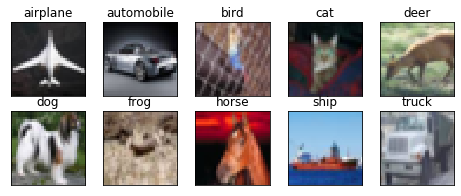

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 18s 46ms/step - loss: 1.8597 - acc: 0.2940 - val_loss: 1.3652 - val_acc: 0.4979
Epoch 2/50
390/390 [==============================] - 9s 22ms/step - loss: 1.3321 - acc: 0.5181 - val_loss: 1.1497 - val_acc: 0.5860
Epoch 3/50
390/390 [==============================] - 9s 22ms/step - loss: 1.1376 - acc: 0.5959 - val_loss: 1.0021 - val_acc: 0.6399
Epoch 4/50
390/390 [==============================] - 9s 22ms/step - loss: 0.9995 - acc: 0.6516 - val_loss: 0.8619 - val_acc: 0.6958
Epoch 5/50
390/390 [==============================] - 9s 22ms/step - loss: 0.8973 - acc: 0.6878 - val_loss: 0.7926 - val_acc: 0.7242
Epoch 6/50
390/390 [==============================] - 9s 23ms/step - loss: 0.8349 - acc: 0.7142 - val_loss: 0.7807 - val_acc: 0.7375
Epoch 7/50
390/390 [==============================] - 9s 22ms/step - loss: 0.7716 - acc: 0.7357 - val_loss: 0.7347 - val_acc: 0.7484
Epoch 8/50
390/390 [==============================] - 9s 23m

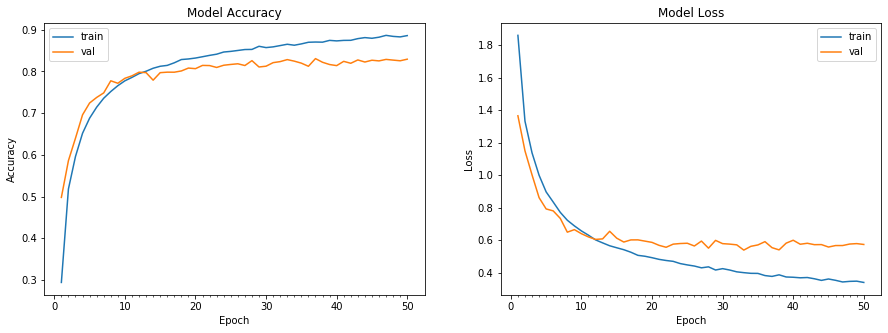

Accuracy on test data is: 82.92


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
#new model
                                                                        # img siz    RF
model1 = Sequential()
model1.add(SeparableConv2D(16,3, padding='same',input_shape=(32, 32, 3)))# 32x32     3x3
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(SeparableConv2D(32,3, padding='same'))                        #32x32     5x5
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(SeparableConv2D(64,3, padding='same'))                        #32x32      7x7
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(SeparableConv2D(128,3, padding='same'))                      #32x32      9x9
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(SeparableConv2D(256,3, padding='same'))                     #32x32       11x11
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))

#adding max pool

model1.add(MaxPooling2D(pool_size=(2,2)))                             #16x16        22x22

#reducing channel size by 1x1 kernal

model1.add(Convolution2D(16,1))                                       #16x16        22x22
model1.add(Activation('relu'))


model1.add(SeparableConv2D(32,3, padding='same'))                     #16x16          24x24 
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(SeparableConv2D(64,3, padding='same'))                     #16x16          26x26 
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(SeparableConv2D(64,3, padding='same'))                     #16x16          28x28 
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(SeparableConv2D(128,3, padding='same'))                     #16x16          30x30 
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(SeparableConv2D(256,3, padding='same'))                     #16x16          32x32
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(MaxPooling2D(pool_size=(2,2)))                              #8x8            64x64

model1.add(Convolution2D(16,1))
model1.add(Activation('relu'))

model1.add(SeparableConv2D(32,3))                                      # 6x6           66x66 
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(Convolution2D(10,6))                                         #1x1           71x71  
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
#model1.add(Activation('relu'))

model1.add(Flatten())
#model1.add(Dense(512))
#model1.add(Activation('relu'))
#model1.add(Dropout(0.5))
model1.add(Dense(256))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))
#model1.add(Activation('softmax'))

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model1.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_17 (Separab (None, 32, 32, 16)        91        
_________________________________________________________________
activation_21 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_18 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
dropout_19 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
separable_conv2d_18 (Separab (None, 32, 32, 32)        688       
_________________________________________________________________
activation_22 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 32)       

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model1.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=195, epochs=50)`
  if sys.path[0] == '':


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
195/195 [==============================] - 85s 437ms/step - loss: 2.0952 - acc: 0.2145 - val_loss: 2.1145 - val_acc: 0.2881
Epoch 2/50
195/195 [==============================] - 75s 382ms/step - loss: 1.6644 - acc: 0.3799 - val_loss: 2.0320 - val_acc: 0.3252
Epoch 3/50
195/195 [==============================] - 75s 382ms/step - loss: 1.5023 - acc: 0.4463 - val_loss: 1.8009 - val_acc: 0.3760
Epoch 4/50
195/195 [==============================] - 74s 380ms/step - loss: 1.3851 - acc: 0.4919 - val_loss: 1.6481 - val_acc: 0.4355
Epoch 5/50
195/195 [==============================] - 74s 379ms/step - loss: 1.3091 - acc: 0.5222 - val_loss: 1.4408 - val_acc: 0.4940
Epoch 6/50
195/195 [==============================] - 74s 380ms/step - loss: 1.2471 - acc: 0.5475 - val_loss: 1.4956 - val_acc: 0.4932
Epoch 7/50
195/195 [==============================] - 74s 380ms/step - loss: 1.1849 - acc: 0.5

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model1.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model1))

Epoch 1/50
  1/390 [..............................] - ETA: 1:00 - loss: 0.7019 - acc: 0.7578

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


390/390 [==============================] - 50s 127ms/step - loss: 0.7374 - acc: 0.7228 - val_loss: 0.7571 - val_acc: 0.7438
Epoch 2/50
390/390 [==============================] - 50s 127ms/step - loss: 0.7281 - acc: 0.7262 - val_loss: 0.6634 - val_acc: 0.7722
Epoch 3/50
390/390 [==============================] - 49s 127ms/step - loss: 0.7269 - acc: 0.7258 - val_loss: 0.6070 - val_acc: 0.7940
Epoch 4/50
390/390 [==============================] - 49s 127ms/step - loss: 0.7140 - acc: 0.7308 - val_loss: 0.6858 - val_acc: 0.7641
Epoch 5/50
390/390 [==============================] - 50s 127ms/step - loss: 0.7092 - acc: 0.7323 - val_loss: 0.8987 - val_acc: 0.6985
Epoch 6/50
390/390 [==============================] - 49s 127ms/step - loss: 0.7149 - acc: 0.7307 - val_loss: 0.6584 - val_acc: 0.7798
Epoch 7/50
390/390 [==============================] - 49s 127ms/step - loss: 0.7082 - acc: 0.7321 - val_loss: 0.6038 - val_acc: 0.7983
Epoch 8/50
390/390 [==============================] - 49s 127ms/st